In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
names = ["Registration Number", "Badge", "Superbadge", "Department", "Batch", "Examly status now"]
df = pd.read_excel("/content/drive/MyDrive/student-list_12-Mar-2022 08_19-12-Mar-2022 08_19.xlsx", names=names)
df.head()

,Registration Number,Badge,Superbadge,Department,Batch,Examly status now
0,19BAI10089,1729,21479,B.Tech CSE - AI and ML,2023,23208.0
1,19BEE10029,4054,16179,B.Tech Electrical and Electronics Engineering,2023,20233.0
2,19BCE10302,1279,17684,B.Tech Computer Science and Engineering,2023,18963.0
3,19BCE10205,4430,12878,B.Tech Computer Science and Engineering,2023,17308.0
4,19BOE10046,1559,15264,B.Tech Bioengineering,2023,16823.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(1288, 6)

In [ ]:
df.columns

Index(['Registration Number', 'Badge', 'Superbadge', 'Department', 'Batch',
       'Examly status now'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Registration Number', 'Department', 'Batch', 'Examly status now'], axis=1)
Y = df['Department']

In [ ]:
print(X)
print(Y)

In [ ]:
params = [{'C': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1288, 2) (901, 2) (387, 2)


In [ ]:
model = GridSearchCV(LogisticRegression(), params, scoring = 'accuracy')
model.fit(X_train, Y_train)

In [ ]:
print(model.best_estimator_)

LogisticRegression(C=0.0001)


In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('The accuracy of training data is:', training_data_accuracy)

The accuracy of training data is: 0.3895671476137625


following code throws error

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('The accuracy of testing data is:', test_data_accuracy)

Yatharth's version

In [ ]:
print(type(df["Badge"][1]))

<class 'int'>


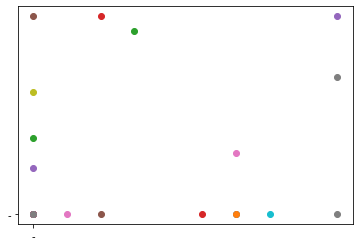

In [ ]:
for i in range(len(df)):
  plt.scatter(x = df["Badge"][i], y = df["Superbadge"][i])
  plt.grid()

In [ ]:
# Assign values to the X and y variables:
X = df.iloc[2:, :-1].values
y = df.iloc[:, 4].values 

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))